# Assignment Descriptions #

One of the main applications of unsupervised learning is dimensionality reduction / feature selection. Often it is a step preceding building a supervised learning model with labelled data. Other times, we don’t have a label but still need to perform dimensionality reduction and/or find clusters in the data.

In this assignment, you are asked to work on the Mercedes- Benz Greener Manufacturing challenge from Kaggle. Go to the Kaggle link: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview (Links to an external site.)Links to an external site. and download the training and testing data sets.

The data has been anonymised and there is target, called ‘y’ but we will not be training a supervised model in this assignment (you are still free and encouraged to do that for the sake of practice).

- Download, load and clean the data. Do not forget to normalize it.
- Perform a principle component analysis (PCA). How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.
- One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what we can do. Using the selected number of components from 2), find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

## Import the train dataset and check the overview##

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
merc_train = pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M6W4\train.csv')

In [3]:
merc_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(merc_train.shape)
#print(merc_test.shape)

(4209, 378)


In [5]:
merc_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
merc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


## Check for variance of the columns, and drop those columns from the data##

In [7]:
def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [8]:
var_zero_cols(merc_train)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [9]:
var_df=pd.DataFrame(merc_train.var(),columns=['Variance'])

**Above columns have zero variance, so dropping them from the data**

In [10]:
merc_train.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)

In [11]:
merc_train.shape

(4209, 366)

## Check for null and unique values for train set##

In [12]:
train_nullcheck_df=pd.DataFrame(merc_train.isna().any(),columns=['IsNull'])

In [13]:
train_nullcheck_df[train_nullcheck_df.IsNull==True]

,IsNull


**There are no null values in the train data**

In [14]:
train_merc_ucnt=pd.DataFrame(merc_train.nunique(),columns=['uniqueCount'])

In [15]:
train_merc_ucnt[train_merc_ucnt.uniqueCount>2]

,uniqueCount
ID,4209
y,2545
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [16]:
train_merc_ucnt[train_merc_ucnt.uniqueCount<=2]

,uniqueCount
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


**All the above columns X0 to X8 are categorical data, so we need to transform them into numerical. Before that Lets look at categorical data and plot them to observe the impact on outcome**

## Analyzing feature X0 ##

In [17]:
merc_train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

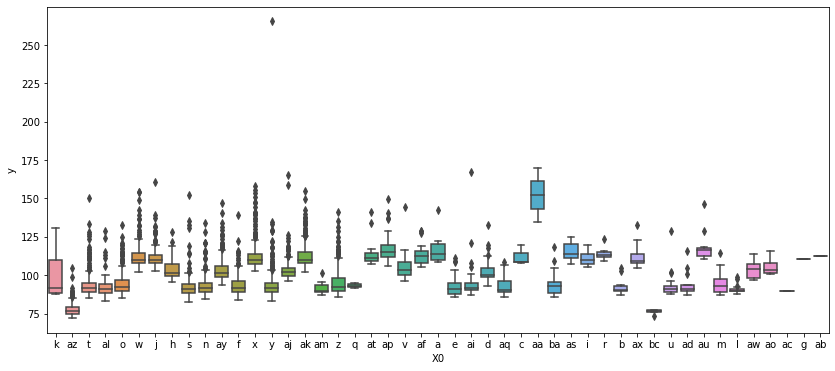

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

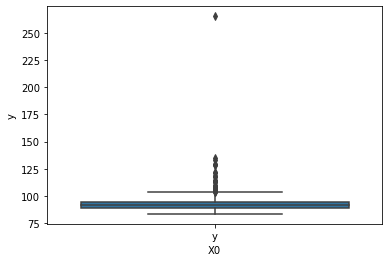

In [19]:
sns.boxplot(x=merc_train.X0[merc_train.X0=='y'],y=merc_train.y)

In [20]:
((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values

array([883], dtype=int64)

**Dropping the extreme outlier observation**

In [21]:
merc_train.shape

(4209, 366)

In [22]:
merc_train.drop(labels=((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)

In [23]:
merc_train.shape

(4208, 366)

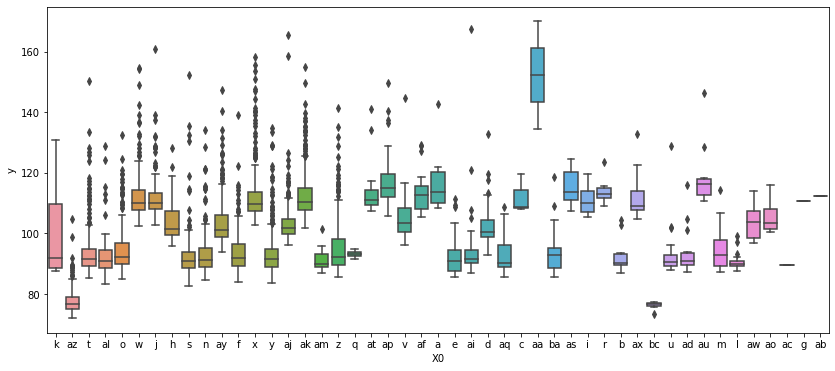

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

In [25]:
merc_train.X0.value_counts()

z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [26]:
def transform_X0(df):
    x0_grp=df.groupby('X0').aggregate(func='count')['ID'].reset_index()
    df['X0'].replace(to_replace=x0_grp[x0_grp['ID']<100]['X0'].values
                            ,value='OT'
                            ,inplace=True)

In [27]:
transform_X0(merc_train)

In [28]:
merc_train.X0.value_counts()

OT    668
z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
Name: X0, dtype: int64

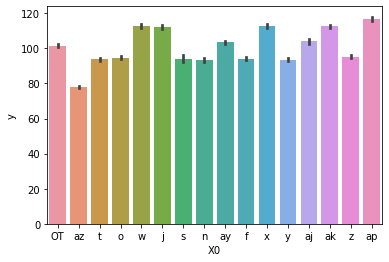

In [29]:
sns.barplot(x=merc_train.X0,y=merc_train.y)

## Analyzing feature X1##

In [30]:
merc_train.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
ab      3
q       3
d       3
Name: X1, dtype: int64

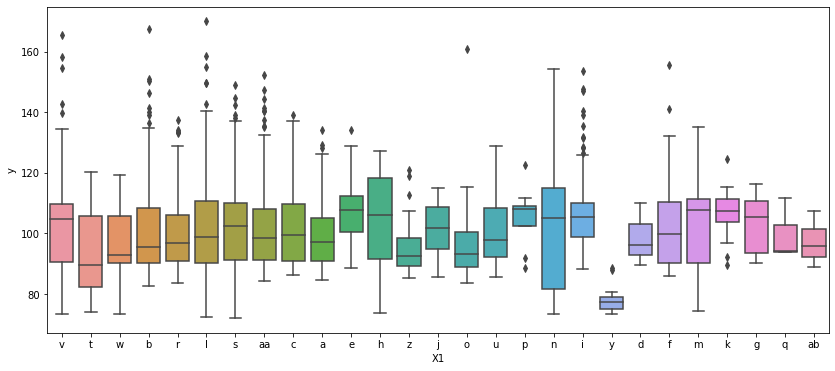

In [31]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

In [32]:
def transform_X1(df):
    x1_grp=df.groupby('X1').aggregate(func='count')['ID'].reset_index()
    df['X1'].replace(to_replace=x1_grp[x1_grp['ID']<100]['X1'].values
                            ,value='OT'
                            ,inplace=True)

In [33]:
transform_X1(merc_train)

In [34]:
merc_train.X1.value_counts()

aa    833
s     598
b     592
l     590
OT    470
v     408
r     250
i     203
a     143
c     121
Name: X1, dtype: int64

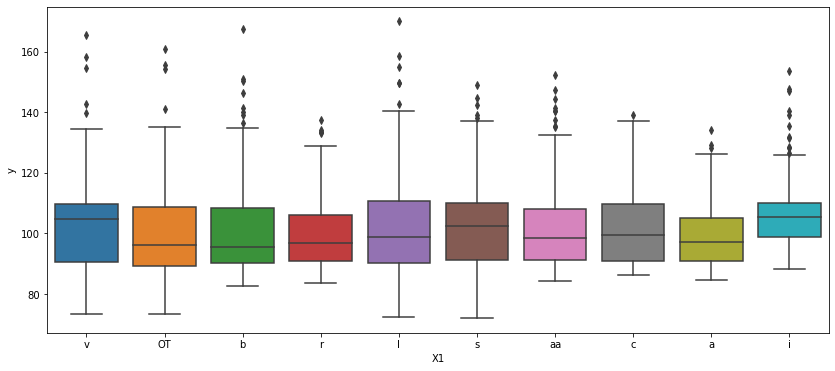

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

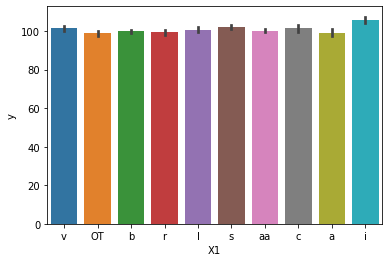

In [36]:
sns.barplot(x=merc_train.X1,y=merc_train.y)

## Analyzing feature X3 ##

In [37]:
merc_train.X3.value_counts()

c    1942
f    1075
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

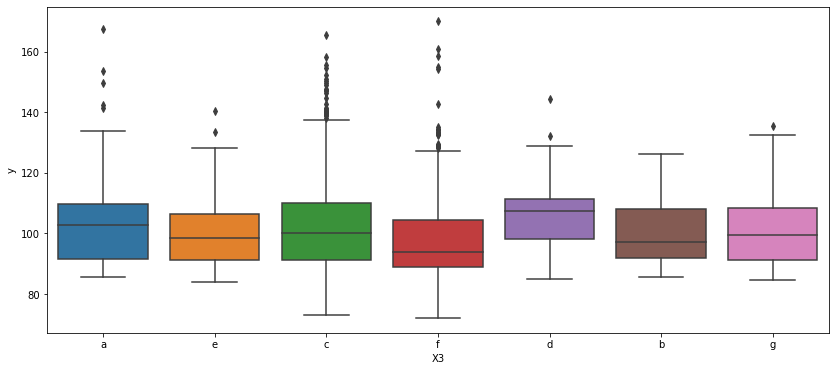

In [38]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X3,y=merc_train.y)

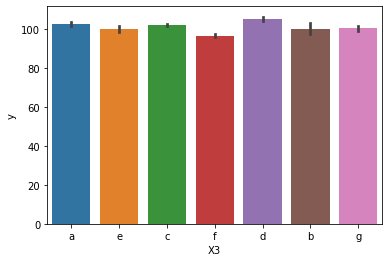

In [39]:
sns.barplot(x=merc_train.X3,y=merc_train.y)

**There are not too many labels, so leaving the data as is**

## Analyzing feature X4 ##

In [40]:
merc_train.X4.value_counts()

d    4204
a       2
c       1
b       1
Name: X4, dtype: int64

**It is evident from the above counts that X4 is 'd' in more than 99% of the cases, so transforming the data to d, ~d** 

In [41]:
merc_train[merc_train.X4!='d']['X4'].values

array(['b', 'c', 'a', 'a'], dtype=object)

In [42]:
def transform_X4(df):
    df['X4'].replace(to_replace=df[df.X4!='d']['X4'].values
                    ,value='~d'
                    ,inplace=True)

In [43]:
transform_X4(merc_train)

In [44]:
merc_train.X4.value_counts()

d     4204
~d       4
Name: X4, dtype: int64

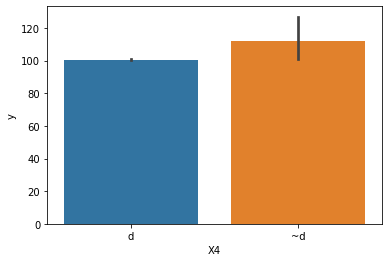

In [45]:
sns.barplot(x=merc_train.X4,y=merc_train.y)

## Analyzing feature X5 ##

In [46]:
merc_train.X5.value_counts()

v     231
w     231
q     220
r     215
s     214
d     214
n     212
m     208
p     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
g       1
u       1
y       1
h       1
Name: X5, dtype: int64

In [47]:
def transform_X5(df):
    x5_grp=df.groupby('X5').aggregate(func='count')['ID'].reset_index()
    df['X5'].replace(to_replace=x5_grp[x5_grp['ID']<100]['X5'].values
                    ,value='OT'
                    ,inplace=True)

In [48]:
transform_X5(merc_train)

In [49]:
merc_train.X5.value_counts()

v     231
w     231
q     220
r     215
s     214
d     214
n     212
p     208
m     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
OT    130
j     125
aa    112
Name: X5, dtype: int64

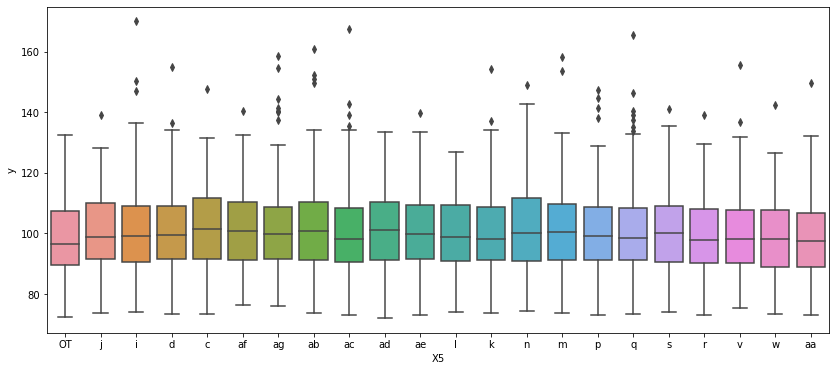

In [50]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X5,y=merc_train.y)

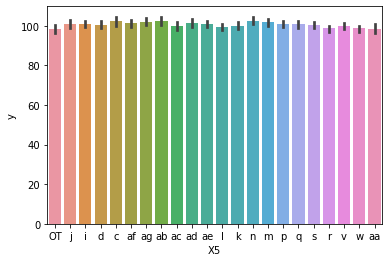

In [51]:
sns.barplot(x=merc_train.X5,y=merc_train.y)

## Analyzing feature X6 ## 

In [52]:
merc_train.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     477
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

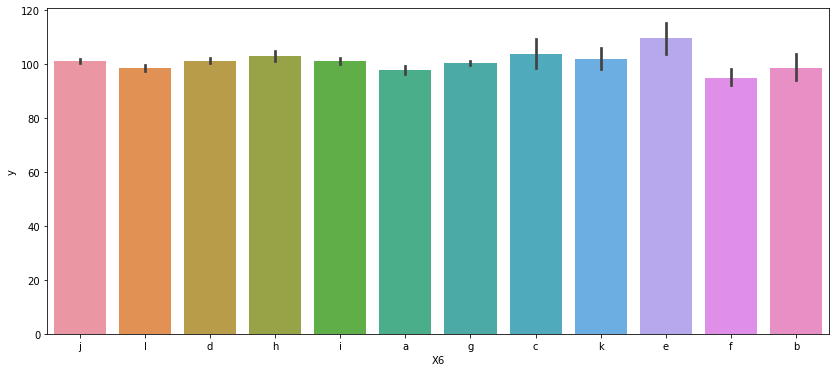

In [53]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X6,y=merc_train.y)

## Analyzing feature X8 ##

In [54]:
merc_train.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    118
h    117
q    117
y    116
x    105
d    103
l    101
p    100
c    100
Name: X8, dtype: int64

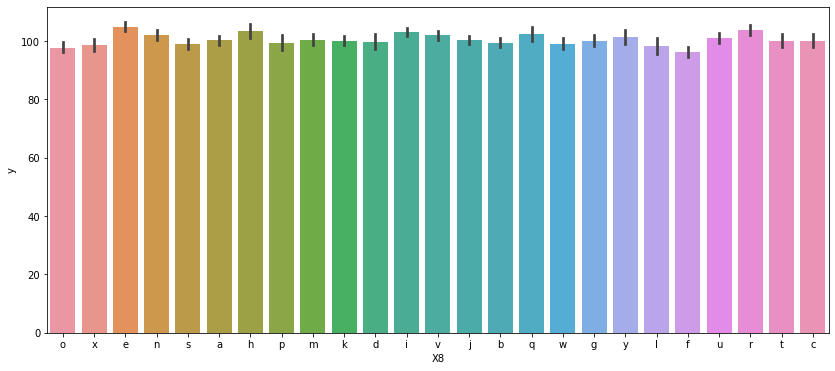

In [55]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X8,y=merc_train.y)

**From the above barplots on categorical features, it is evident that outcome(y) is not majorly impacted by these features**

## Applying label encoder on categorical features to convert them to numerical##

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
x=merc_train.drop(columns='y')
y=merc_train.y

In [58]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,OT,v,at,a,d,OT,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,OT,OT,av,e,d,OT,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,OT,n,c,d,OT,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,OT,n,f,d,OT,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,OT,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
catCols=merc_train.select_dtypes(include="object").columns

In [60]:
catCols

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [61]:
def transform_labels(df,x):
    catCols=df.select_dtypes(include="object").columns
    le=LabelEncoder()
    for i in catCols:
        le.fit(x[i])
        x[i]=le.transform(x[i])

In [62]:
transform_labels(merc_train,x)

In [63]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,9,17,0,0,0,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,19,4,0,0,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,5,0,34,2,0,0,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,5,0,34,5,0,0,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,5,9,34,5,0,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0


**From the above barplots, we can say that categorical features X1,X2,X3,X5,X7,X8 are not making much impact on the outcome, so considering PCA on X0,X4,X6**

## Data Normalization ##

In [64]:
scaled_data = StandardScaler().fit_transform(x)
x = pd.DataFrame(scaled_data, columns = x.columns)
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,-1.725888,-1.388044,1.539369,-0.028346,-1.678072,-0.030846,-1.772446,0.752224,0.339698,-0.116136,...,-0.684287,-0.246478,1.475076,-0.145298,-0.097964,-0.090253,-0.087538,-0.04082,-0.021806,-0.037787
1,-1.723426,-1.388044,-1.522231,0.155161,0.621285,-0.030846,-1.772446,1.438035,0.339698,-0.116136,...,1.461376,-0.246478,-0.677931,-0.145298,-0.097964,-0.090253,-0.087538,-0.04082,-0.021806,-0.037787
2,-1.723016,-0.425059,-1.522231,1.531465,-0.528393,-0.030846,-1.772446,0.752224,1.618659,-0.116136,...,-0.684287,-0.246478,-0.677931,-0.145298,-0.097964,-0.090253,11.423660,-0.04082,-0.021806,-0.037787
3,-1.722195,-0.425059,-1.522231,1.531465,1.196125,-0.030846,-1.772446,1.438035,-1.081368,-0.116136,...,-0.684287,-0.246478,-0.677931,-0.145298,-0.097964,-0.090253,-0.087538,-0.04082,-0.021806,-0.037787
4,-1.720554,-0.425059,1.539369,1.531465,1.196125,-0.030846,-1.772446,-1.305208,0.197592,-0.116136,...,-0.684287,-0.246478,-0.677931,-0.145298,-0.097964,-0.090253,-0.087538,-0.04082,-0.021806,-0.037787


## Trying to reduce dimensions using PCA ##

In [65]:
from sklearn.decomposition import PCA

In [66]:
pcaModel=PCA()

In [67]:
#x_pca_data = x.iloc[:,0:8]#x[['X0','X4','X6']] #

In [68]:
pcaModel.fit(x)

PCA()

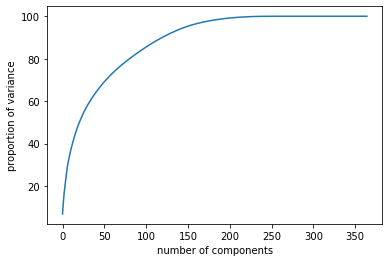

In [69]:
# We can plot the cumulative explained variance ratio to check the % of variance in the dataset covered by the buildup of PCA components.
plt.plot(pcaModel.explained_variance_ratio_.cumsum()*100)
plt.xlabel('number of components')
plt.ylabel('proportion of variance')
plt.show()

Text(0, 0.5, 'variance')

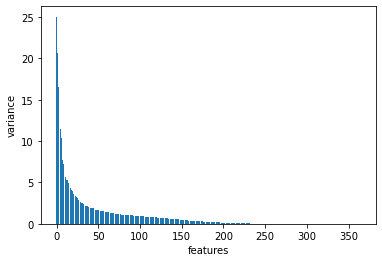

In [70]:
#To find out how many components to use, we will keep track of the variance explained with the increase of a number of features.
features = range(pcaModel.n_components_)
plt.bar(features, pcaModel.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

**We can either eye-balling from the graph above to choose the number of components that capture a large enough proportion of the variance, say at least 95%. Alternatively, we can also directly give the number of explained variance ratio we want as an argument in the pca** 

In [71]:
pca_95 = PCA(n_components=0.95).fit(x)
x_pca_95 = pca_95.transform(x)
print('How many components does the 95% explained variance retain:  {}'.format(x_pca_95.shape[1]))

How many components does the 95% explained variance retain:  149


**From the above result, we will choose 150 as the number of PCA components and there by plot the proportion of explained variance and the number of components.**

In [72]:
# create a PCA object again (instantiate) by considering first 150 principal components
pca_150=PCA(n_components=150)

In [73]:
# fit and transform the train dataset
# transform the test dataset

# fit the train dataset
pca_fit_train_X_150 = pca_150.fit(x)

# transform the train dataset
pca_fit_transform_train_X_150 = pca_fit_train_X_150.transform(x)

In [74]:
## check the variation for the first 150 principal components 
pca_train_X_variation_150 = np.round(pca_fit_train_X_150.explained_variance_ratio_.cumsum()*100,decimals=1)
pca_train_X_variation_150
##

array([ 6.9, 12.5, 17. , 20.4, 23.7, 26.9, 29.7, 31.8, 33.8, 35.6, 37.2,
       38.8, 40.2, 41.7, 43. , 44.3, 45.6, 46.7, 47.9, 48.9, 49.9, 50.9,
       51.8, 52.7, 53.6, 54.5, 55.2, 56. , 56.7, 57.5, 58.2, 58.8, 59.5,
       60.1, 60.8, 61.4, 61.9, 62.5, 63.1, 63.6, 64.2, 64.7, 65.3, 65.8,
       66.3, 66.8, 67.3, 67.8, 68.2, 68.7, 69.1, 69.6, 70. , 70.4, 70.9,
       71.3, 71.7, 72.1, 72.5, 72.9, 73.3, 73.7, 74. , 74.4, 74.8, 75.1,
       75.5, 75.8, 76.2, 76.5, 76.8, 77.2, 77.5, 77.8, 78.1, 78.4, 78.8,
       79.1, 79.4, 79.7, 80. , 80.3, 80.6, 80.9, 81.2, 81.4, 81.7, 82. ,
       82.3, 82.6, 82.9, 83.1, 83.4, 83.7, 83.9, 84.2, 84.5, 84.7, 85. ,
       85.3, 85.5, 85.8, 86. , 86.3, 86.5, 86.8, 87. , 87.3, 87.5, 87.7,
       88. , 88.2, 88.4, 88.7, 88.9, 89.1, 89.3, 89.5, 89.8, 90. , 90.2,
       90.4, 90.6, 90.8, 91. , 91.2, 91.4, 91.6, 91.8, 92. , 92.2, 92.3,
       92.5, 92.7, 92.9, 93. , 93.2, 93.4, 93.5, 93.7, 93.9, 94. , 94.2,
       94.3, 94.5, 94.6, 94.8, 94.9, 95. , 95.2])

Text(0, 0.5, 'Cumulative percentage of explained variance ')

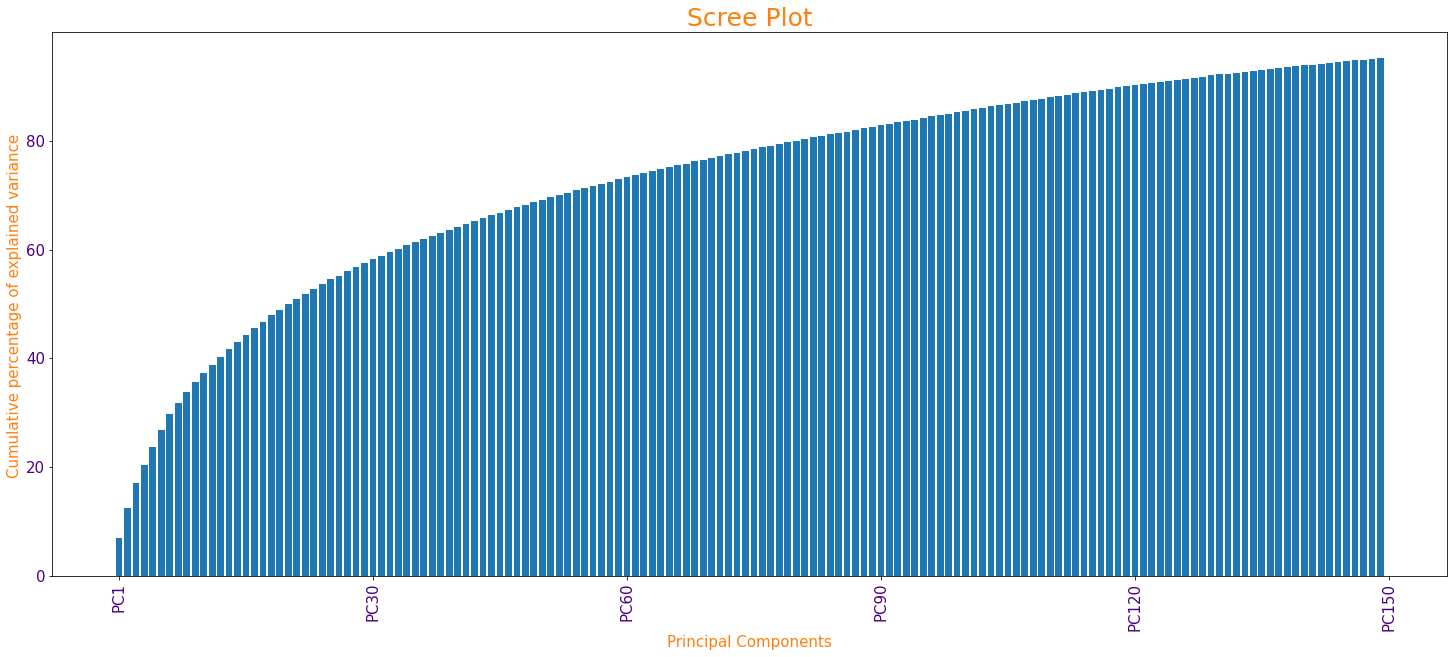

In [75]:
# generate the scree plot
## 
plt.figure(figsize=(25,10))
##
plt.bar(x=range(1, len(pca_train_X_variation_150)+1), height=pca_train_X_variation_150)
##
plt.xticks(np.arange(1, 155, step=30), ['PC1', 'PC30', 'PC60', 'PC90', 'PC120', 'PC150'], rotation=90, color='indigo', size=15)
plt.yticks(rotation=0, color='indigo', size=15)
##
##################
plt.title('Scree Plot',color='tab:orange', fontsize=25)
###################
##
plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
##

In [76]:
x_pca=pd.DataFrame(pca_fit_transform_train_X_150)

In [77]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,12.376851,-2.773476,-0.778542,1.788914,-1.303255,-3.748896,8.956082,-3.778298,-16.390231,8.443922,...,-0.176189,-0.231010,0.087575,-0.356518,-0.002331,-0.229344,0.210320,-0.104982,-0.451868,-0.240298
1,-0.102893,0.244312,0.812741,1.138951,-2.543796,-0.056889,0.873845,-0.483038,-0.761948,0.032932,...,1.259225,-1.093316,-0.949860,0.700179,-1.350710,0.234058,1.684998,2.745511,2.490551,-0.661773
2,9.989586,21.148657,-4.893128,-4.432381,0.804407,2.604364,1.031247,3.972039,-1.189738,1.119209,...,-11.314751,-6.989335,1.285255,1.004345,3.101954,0.515318,-0.958292,2.338690,1.209303,-0.254722
3,7.090980,21.440999,-5.788614,0.257321,1.960750,0.720504,0.387890,0.106746,0.103594,2.847568,...,1.601903,0.890329,0.548288,-0.197535,0.652513,-0.090420,0.314907,-0.386463,-0.319789,0.666631
4,6.359971,21.637068,-6.021265,0.873290,2.006361,-0.019136,-0.875080,-0.388436,1.007767,0.867417,...,-12.033390,-7.885741,2.976598,1.887594,6.098341,0.632530,-1.485490,3.960610,2.940706,-0.083946


In [84]:
def corr_feature_pca_component(original_data, pca_data, column):
    """
    This function takes in a data frame of selected number of principal components, correlated them with the original features,
    and returns a dataframe with sorted correlation between one column of the principal component table and the original features
    
    INPUT
    original data: pd.dataframe()
    pca_data: pd.dataframe() where each column is the values of each PCA component vector
    column: a PC of choice
    
    """
    corr_pc = pd.DataFrame(original_data.corrwith(pca_data[column]), columns = [column])
    corr_pc = corr_pc.abs()
    return corr_pc.sort_values(by=column, ascending=False)


In [85]:
corr_pc = pd.DataFrame(x, x_pca)

for i in range (1,150):
    corr_pc[i] = corr_feature_pca_component(x, x_pca, i)

ValueError: Index data must be 1-dimensional

In [ ]:
def is_corr_above_threshold(data, column, corr_values=[0.75, 0.8, 0.9]):
    """
    This function takes in the data set with sorted correlation values, and a list of correlation values and return a data set with binary
    columns, where the new columns = 1 if the corr is above a specified threshold and 0 otherwise. 
    
    #####
    INPUT:
    
    data: pd.dataframe() of one of the datasets above, which contain the absolute values of correlation between principal components and original
    features
    
    column: the respective column of the data set (principle component 1, 2, etc.)
    corr_values : a list of correlation values to consider
    
    #####
    RETURNS:
    
    data: pd.dataframe(), which is the original data + extra binary columns as specified above 
    
    """
    for i in corr_values: 
        threshold = []
        
        for value in data[column]:
            if value >= i:
                threshold.append(1)
            else:
                threshold.append(0)
        data['threshold' + str(i)] = threshold
    return data

In [ ]:
corr_pc2 = is_corr_above_threshold(corr_pc2, 2)
corr_pc2.head()